In [3]:
import pandas as pd
data = pd.read_csv('/content/5_years_data_top_crypto.csv')

In [4]:
data.head(100)


,Date,Open,High,Low,Close,Volume,MarketCap,CryptoName
0,2021-10-25,60893.93,63729.33,60691.80,63039.83,3.106491e+10,1.188575e+12,bitcoin
1,2021-10-24,61368.34,61505.80,59643.35,60930.84,2.731618e+10,1.148743e+12,bitcoin
2,2021-10-23,60694.63,61743.88,59826.52,61393.62,2.688255e+10,1.157410e+12,bitcoin
3,2021-10-22,62237.89,63715.02,60122.80,60692.26,3.843408e+10,1.144131e+12,bitcoin
4,2021-10-21,66002.23,66600.55,62117.41,62210.17,4.590812e+10,1.172684e+12,bitcoin
...,...,...,...,...,...,...,...,...
95,2021-07-22,32138.87,32576.40,31745.30,32313.11,1.955523e+10,6.063169e+11,bitcoin
96,2021-07-21,29796.29,32752.33,29526.18,32110.69,2.820302e+10,6.024893e+11,bitcoin
97,2021-07-20,30838.29,31006.19,29360.96,29807.35,2.314827e+10,5.592443e+11,bitcoin
98,2021-07-19,31800.01,31885.86,30563.74,30817.83,2.043479e+10,5.781781e+11,bitcoin


In [5]:
data.shape


(8518, 8)

EDA on cryptocurrencies

In [6]:
data.describe()

,Open,High,Low,Close,Volume,MarketCap
count,8518.000000,8518.000000,8518.000000,8518.000000,8.518000e+03,8.518000e+03
mean,3037.422674,3125.902879,2943.270872,3045.280940,1.284299e+10,7.491193e+10
std,8915.854287,9180.542588,8629.909603,8939.530224,2.386058e+10,1.700539e+11
min,0.018410,0.021050,0.017350,0.018540,9.284000e+03,0.000000e+00
25%,1.000000,1.010000,0.997100,1.000000,1.828869e+08,2.218582e+09
50%,17.685000,18.155000,17.085000,17.695000,2.420485e+09,1.401750e+10
75%,793.760000,832.960000,777.920000,803.842500,1.616679e+10,6.649553e+10
max,66002.230000,66930.390000,63610.670000,65992.840000,3.509679e+11,1.243927e+12


Description of the dataframe columns:

1)Date - Date range of cryptocurrency for analysis

2)Open - Price of the cryptocurrency at the Start of the Day

3)High - Highest Price of the cryptocurrency

4)Low  -Lowest Price of the cryptocurrency

5)Close -Price of the cryptocurrency at the End of the Day

6)Volume -Volume is the amount of assets traded during a specific time frame

7)MarketCap -Total value of cryptocurrency.

8)CryptoName - Name of the cryptocurrency.


<h2>Time-series forecasting</h2>

In [7]:
d_time = (data['Date'] >= '2020-10-23') & (data['Date'] <= '2021-10-23')
data_time=data.loc[d_time]
data_time
print ("Time range start:",data_time.Date.min())
print ("Time range end  :",data_time.Date.max())

Time range start: 2020-10-23
Time range end  : 2021-10-23


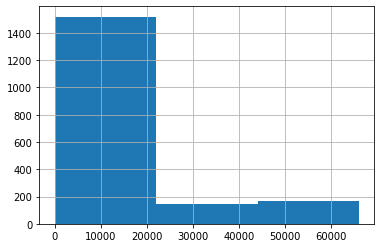

In [8]:
data_time.Close.hist(bins=3)

In [9]:
#Augmented Dickey Fuller test ( ADF Test) is a common statistical test used to test whether a given Time series is stationary or not .
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(data_time['Close'])
h0= "Data is not stationary"
h1= "Data is stationary"

print("ADF value is: ",adftest[0])
print("The p-value is : ", adftest[1])
print("Number of lags are: ", adftest[2])
print("Num Of Observations Used For ADF Regression:", adftest[3])
print("Critical Values are:")
for key, value in adftest[4].items():
    print('\t%s: %.3f' % (key, value))

ADF value is:  -2.08201818353458
The p-value is :  0.2518063798197273
Number of lags are:  24
Num Of Observations Used For ADF Regression: 1805
Critical Values are:
	1%: -3.434
	5%: -2.863
	10%: -2.568


<h3>Observation are:</h3>
<p>Here we can observe that ADF value is -2.08 , the more negetive the value is it means we cant reject the null hypothesis , but we can say that data is not stationary.</p>
<p>But , if we compare ADF value with -2.08 which is greater than 1% , so with significance level less than 1% we can accept the null hypothesis that data is not stationary.</p>

<h2>Arima</h2>

In [10]:
from pmdarima import auto_arima

#d is The order of first-differencing. 
#trace is to print the status of fit
#If random is True, rather than perform an exhaustive search or stepwise search, only n_fits ARIMA models will be fit
#If random is True and a “random search” is going to be performed, n_iter is the number of ARIMA models to be fit.

auto_fit = auto_arima(data_time['Close'],d=2,error_action='warn', trace=True ,random='True',suppress_warnings=True,n_fits=15)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=2.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=31081.130, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=30582.797, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=30212.431, Time=0.26 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.85 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=2.16 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=30214.081, Time=0.87 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 7.158 seconds


In [11]:
auto_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1830
Model:               SARIMAX(0, 2, 1)   Log Likelihood              -15104.215
Date:                Sun, 28 Nov 2021   AIC                          30212.431
Time:                        01:23:46   BIC                          30223.453
Sample:                             0   HQIC                         30216.496
                               - 1830                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8247      0.005   -163.421      0.000      -0.835      -0.815
sigma2       7.44e+05   7094.370    104.877      0.000     7.3e+05    7.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             56717.53
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -1.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# train test split for testing the model

train_data=data_time['Close'].iloc[:-120]
test_data =data_time['Close'].iloc[-120:]

In [13]:
# fitting the training data with autoarima.
model = auto_fit.fit(train_data)

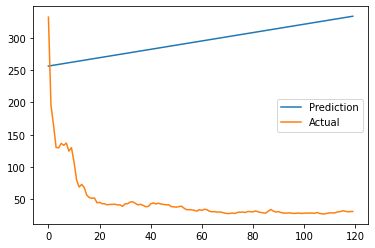

In [15]:
#Forecasting for 120 hours in future for Cryptocurrency closing price.
import numpy as np
import matplotlib.pyplot as plt


forecast = model.predict(n_periods = 120, return_conf_int = True)
plt.plot(np.array(forecast[0]), label='Prediction')
plt.plot(np.array(test_data), label='Actual')
a=plt.legend()

In [16]:
y_hat=np.array(test_data)
y_pred=np.array(forecast[0])

In [17]:
y_hat

array([332.62, 195.93, 164.67, 130.06, 129.57, 136.43, 133.45, 136.95,
       124.43, 129.74, 107.9 ,  79.83,  68.59,  72.73,  67.85,  55.93,
        52.24,  51.06,  51.61,  44.28,  44.77,  42.85,  42.53,  40.99,
        41.69,  41.62,  41.88,  40.82,  40.86,  38.65,  42.61,  42.79,
        45.35,  45.68,  43.17,  40.92,  41.79,  40.14,  38.11,  38.37,
        42.45,  43.93,  42.4 ,  43.45,  42.17,  41.73,  40.93,  41.15,
        38.24,  37.91,  37.38,  38.14,  38.95,  35.84,  33.51,  33.48,
        33.16,  32.5 ,  31.1 ,  33.48,  32.27,  34.16,  33.3 ,  30.94,
        30.18,  30.49,  29.55,  30.03,  29.1 ,  28.16,  27.36,  27.7 ,
        28.13,  27.64,  29.38,  29.54,  29.73,  29.07,  30.7 ,  30.3 ,
        30.11,  31.39,  30.12,  29.14,  28.48,  28.2 ,  31.34,  33.8 ,
        30.97,  29.93,  30.39,  28.89,  28.09,  28.08,  28.53,  28.06,
        27.62,  27.94,  28.18,  27.61,  27.96,  28.19,  28.02,  28.31,
        27.74,  29.02,  27.68,  26.93,  26.86,  27.88,  28.46,  28.43,
      

In [18]:
y_pred

array([256.60046978, 257.25093956, 257.90140934, 258.55187912,
       259.2023489 , 259.85281867, 260.50328845, 261.15375823,
       261.80422801, 262.45469779, 263.10516757, 263.75563735,
       264.40610713, 265.05657691, 265.70704669, 266.35751646,
       267.00798624, 267.65845602, 268.3089258 , 268.95939558,
       269.60986536, 270.26033514, 270.91080492, 271.5612747 ,
       272.21174448, 272.86221426, 273.51268403, 274.16315381,
       274.81362359, 275.46409337, 276.11456315, 276.76503293,
       277.41550271, 278.06597249, 278.71644227, 279.36691205,
       280.01738182, 280.6678516 , 281.31832138, 281.96879116,
       282.61926094, 283.26973072, 283.9202005 , 284.57067028,
       285.22114006, 285.87160984, 286.52207962, 287.17254939,
       287.82301917, 288.47348895, 289.12395873, 289.77442851,
       290.42489829, 291.07536807, 291.72583785, 292.37630763,
       293.02677741, 293.67724718, 294.32771696, 294.97818674,
       295.62865652, 296.2791263 , 296.92959608, 297.58

In [19]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_hat, y_pred)

249.68483046911874

<h2>FBProphet</h2>
<p>Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.It is automatic forecasting procedure.</p>

<p> <h4>Steps to create the model:</h4>
    
1.Initialize Model:
    Prophet()
    
2.Set columns as ds,y
    
3.Fit dataset: 
    Prophet().fit()
    
4.Create Dates To predict: 
    Prophet().make_future_dataframe(periods=168)
    
5.Predict :
    Prophet().predict(future_dates)
    
6.Plot:
    Prophet().plot(predictions)
</p>

In [27]:
from fbprophet import Prophet

df = data_time[['Date','Close']]
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

model=Prophet()

model.fit(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
# Making predictions for a year in advance 

future_dates=model.make_future_dataframe(periods=120,freq='1H',include_history = False)
prediction=model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-23 01:00:00,10422.221093,-11048.635386,31333.118310,10422.221093,10422.221093,42.455133,42.455133,42.455133,42.455133,42.455133,42.455133,0.0,0.0,0.0,10464.676226
1,2021-10-23 02:00:00,10422.391386,-12176.380643,30933.842567,10422.391386,10422.391386,39.208787,39.208787,39.208787,39.208787,39.208787,39.208787,0.0,0.0,0.0,10461.600173
2,2021-10-23 03:00:00,10422.561679,-12650.623574,34149.242839,10422.561679,10422.561679,35.860410,35.860410,35.860410,35.860410,35.860410,35.860410,0.0,0.0,0.0,10458.422089
3,2021-10-23 04:00:00,10422.731972,-10779.663596,31629.904654,10422.731972,10422.731972,32.438523,32.438523,32.438523,32.438523,32.438523,32.438523,0.0,0.0,0.0,10455.170495
4,2021-10-23 05:00:00,10422.902265,-11468.303551,32558.709164,10422.902265,10422.902265,28.971657,28.971657,28.971657,28.971657,28.971657,28.971657,0.0,0.0,0.0,10451.873922


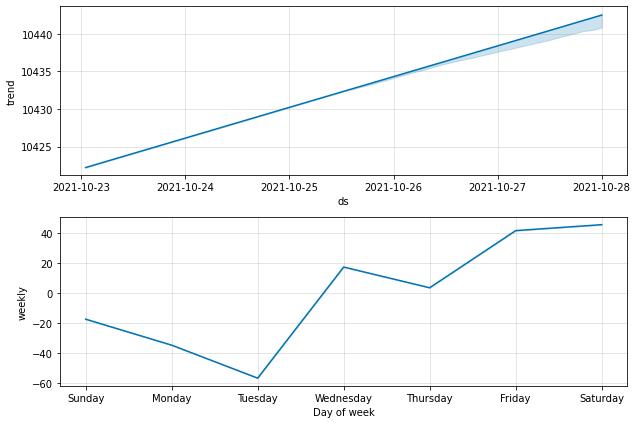

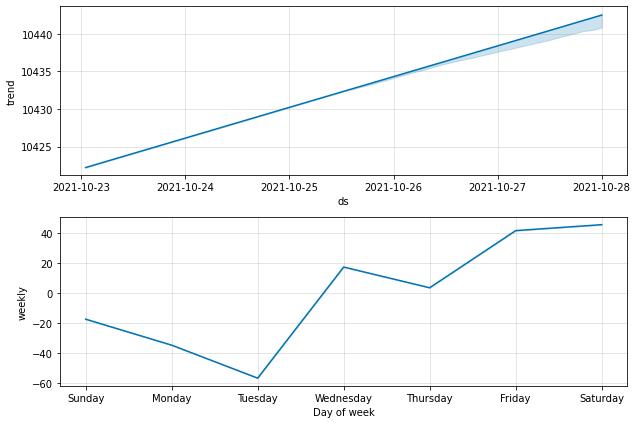

In [29]:
# Plotting the model components 

model.plot_components(prediction)

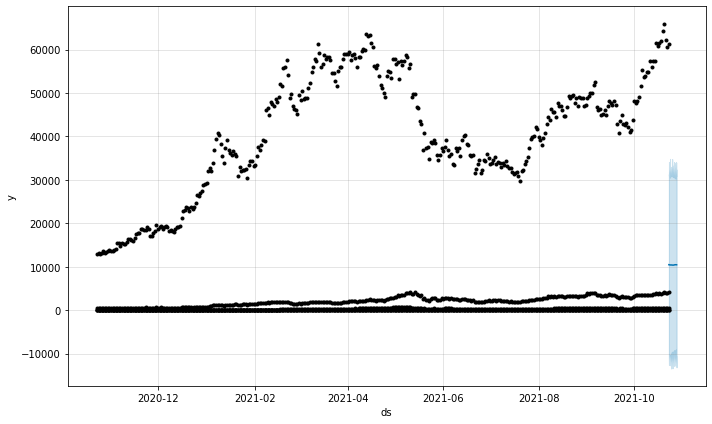

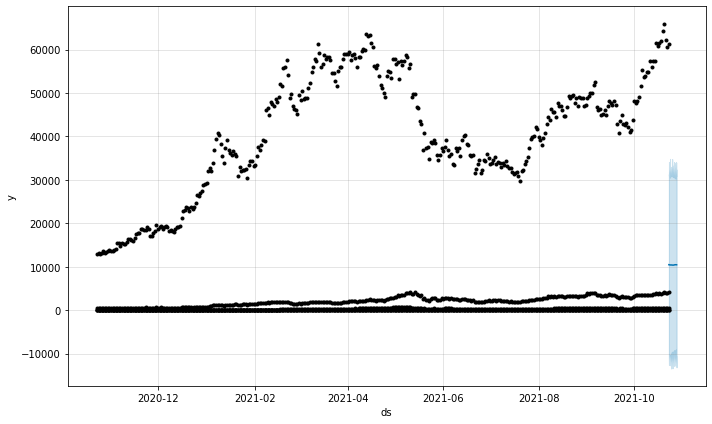

In [30]:
# Plotting the prediction

model.plot(prediction)

In [32]:
#cross validation for dataset.
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

df_cv_results = cross_validation(model, horizon = '2190 hours') # 2190?
df_cv_results 

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-07-23 18:00:00 and 2021-07-23 18:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-07-24,7873.129038,-11560.249328,30322.314325,2189.22,2021-07-23 18:00:00
1,2021-07-24,7873.129038,-11149.638048,28568.995969,34292.45,2021-07-23 18:00:00
2,2021-07-24,7873.129038,-13650.352755,26821.125149,302.07,2021-07-23 18:00:00
3,2021-07-24,7873.129038,-13664.894663,30323.129853,1.23,2021-07-23 18:00:00
4,2021-07-24,7873.129038,-12421.711969,28330.390329,1.00,2021-07-23 18:00:00
...,...,...,...,...,...,...
455,2021-10-23,5409.468798,-16465.820160,26385.246382,485.91,2021-07-23 18:00:00
456,2021-10-23,5409.468798,-16445.568029,26026.379334,4171.66,2021-07-23 18:00:00
457,2021-10-23,5409.468798,-14895.679203,26272.296262,2.17,2021-07-23 18:00:00
458,2021-10-23,5409.468798,-13901.647282,26775.699600,1.00,2021-07-23 18:00:00


In [34]:
df_perf_metrics = performance_metrics(df_cv_results)
df_perf_metrics



,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days 06:00:00,2.414344e+08,15538.158955,11962.404713,2752.057447,23.584461,0.8
1,10 days 06:00:00,2.451510e+08,15657.297753,12004.340867,2728.393694,23.119028,0.8
2,11 days 06:00:00,2.487824e+08,15772.836429,12039.193868,2707.537595,22.271404,0.8
3,12 days 06:00:00,2.513184e+08,15853.025228,12052.082023,2687.675442,21.994184,0.8
4,13 days 06:00:00,2.555530e+08,15986.024817,12085.582069,2666.671738,21.994184,0.8
...,...,...,...,...,...,...,...
78,87 days 06:00:00,6.059398e+08,24615.844976,14476.248053,1644.746242,10.992087,0.8
79,88 days 06:00:00,6.281977e+08,25063.872399,14642.624448,1637.212970,10.903149,0.8
80,89 days 06:00:00,6.422376e+08,25342.406899,14742.195124,1629.292804,10.824903,0.8
81,90 days 06:00:00,6.508621e+08,25511.999444,14794.122738,1621.733482,10.690232,0.8


**Observation**

For the horizon of 9 days , we can see that RMSE 15538 and it increases with increase in horizon.

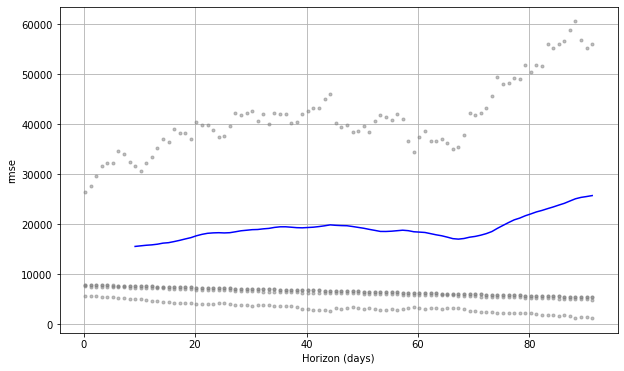

In [36]:
#Plotting the RMSE

fig = plot_cross_validation_metric(df_cv_results, metric='rmse')